# Continuous Control

---

This notebook runs a deep reinforcement learning agent (particularly a DDPG agent) to solve Udacity's DRLND Continuous Control project (project 2).
### 0. Get Prepared
Follow these instructions if you are working locally (you want to setup a Jupyter Notebook locally).
 Otherwise skip to Section 1.

#### 0.1 Setup the right Python version
Use Python 3.6. You may want to either use a virtual env or setup a Conda environment as explained here:

https://github.com/udacity/deep-reinforcement-learning#dependencies

#### 0.2 Get the python dependencies requirements.txt
Checkout the ./python folder of the Udacity DRLND repo:

https://github.com/udacity/deep-reinforcement-learning

It has a requirements.txt to ensure installing the necessary dependencies in the version specified by the course
(do this only when you want to work locally). Otherwise use the reference notebook provided by the course which is pre setup properly.

#### 0.3 Get the Pre-built Unity Environment
Since this is an RL problem an environment is needed.
The course requires you to use the pre-built environment.
Get the right version for you from the link provided in Reacher_Twenty_Linux_No_Vis/README

#### 0.4 Install Dependencies

Run the next code cell to install a few packages.  This line will take a few minutes to run!

Make sure you have the python folder with the right requirements.txt. See Section 0.

In [1]:
import os
deps_dir="./"
deps_file=os.path.join(deps_dir,"requirements.txt")
if os.path.exists(deps_file):
    !pip -q install -r $deps_file
else:
    print("Could not locate requirements.txt. Check section 0")

### 1. Explore the Environment
<span style="color:red">WARNING: DON'T EXECUTE THIS CELL IF YOU WILL ACTUALLY USE THE ENV FOR TRAINING BELOW. The provided unity env is buggy and training simply fails. You would need to restart the Kernel.</span>.

In the following you get the chance to load the environment to:

In the next code cells, you will learn how to use the Python API to control the agent and receive feedback from the environment.

- make sure you can load it at all
- explore its characteristics

#### 1.1 Explore Characteristcs

In [ ]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
# env = UnityEnvironment(file_name='Reacher_One_Linux_NoVis/Reacher.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='Reacher_Twenty_Linux_NoVis/Reacher.x86_64')

In [ ]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

#### 1.2 Take Random Actions in the Environment

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [ ]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))


### 2. Training a DDPG Agent to Solve the Challenge

As you can see above a purely random agent performs - as expected - very poorly.
Let's train a clever agent that can susbstantially outperform it.
Important notes:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine!

In [2]:
from continuous_navigation_project import state_size, action_size, num_agents
from continuous_navigation_project.agent import Agent
from continuous_navigation_project.ddpg import ddpg
agent = Agent(state_size=state_size, action_size=action_size, random_seed=2, num_parallel_agents=num_agents,
              num_trainings_per_update=20,
              time_steps_before_training=20,
              batch_size=128,
              num_episodes_to_increase_num_trainings=130,
              lr_actor=1e-4,
              lr_critic=1e-4,
              make_local_target_weights_equal_at_init=True,
              clip_grad_norm=False)

episodes_to_make_target_equal_to_local = 5
max_timesteps_per_episode = 1000
scores_global, episode_durations = ddpg(agent=agent,
                                        n_episodes=130,
                                        max_t=max_timesteps_per_episode,
                                        print_every=20,
                                        episodes_to_make_target_equal_to_local=episodes_to_make_target_equal_to_local)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 
/home/q409893/work/tools/miniconda3/envs/udacity/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")




---------------------
Environment successfully started
Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]
--------------------------------------------------------------
device used: cuda:0
--------------------------------------------------------------
Episode 20	Average mean agent Score: 2.85. Average duration 7.5s. Averages over last 20 episodes.
Episode 40	Avera

In [19]:
import matplotlib.pyplot as plt
import numpy as np
def generate_plot_name(attributes: dict):
    """
    Generates a title for the plots showing the learning curve. The title encodes the used configuration of the agent.
    :param attributes: dict of key-values that encode configuration var and its value (e.g. {"max_t":300}).
        Simply put everything you want to have in the plot title
    :return: string title
    """
    title = ""
    for key in attributes.keys():
        title += "{} {}\n".format(key, attributes[key])

    return title


def generate_training_plots(scores_global, episode_durations, attributes):
    """
    Generates subplots showing the mean score and training duration per episode
    :param scores_global: List of mean scores where each element represents an episode
    :param episode_durations: List of episode duration where each element represents an episode
    :param attributes: A dict where each key-value pair gets converted to a string added to the plot title
    """
    fig = plt.figure(figsize=(18,10))
    ax_score = fig.add_subplot(413)
    plt.plot(np.arange(1, len(scores_global) + 1), scores_global)
    plt.ylabel('Accum Rewards (Score)')
    plt.xlabel('Episode #')
    max_y = np.max(scores_global)
    max_y = (int(max_y / 10) + 1) * 10
    plt.ylim(0, max_y)
    grid_step = 10
    ax_score.set_yticks(range(10, max_y, grid_step), minor=False)
    ax_score.yaxis.grid(True, which="major")

    ax_duration = fig.add_subplot(414)
    num_episodes = len(episode_durations)
    plt.plot(np.arange(1, num_episodes + 1), episode_durations)
    plt.ylabel('Training Duration [s]')
    plt.xlabel('Episode #')
    title = generate_plot_name(attributes)
    fig.suptitle(title, fontsize=12)
    plt.show()

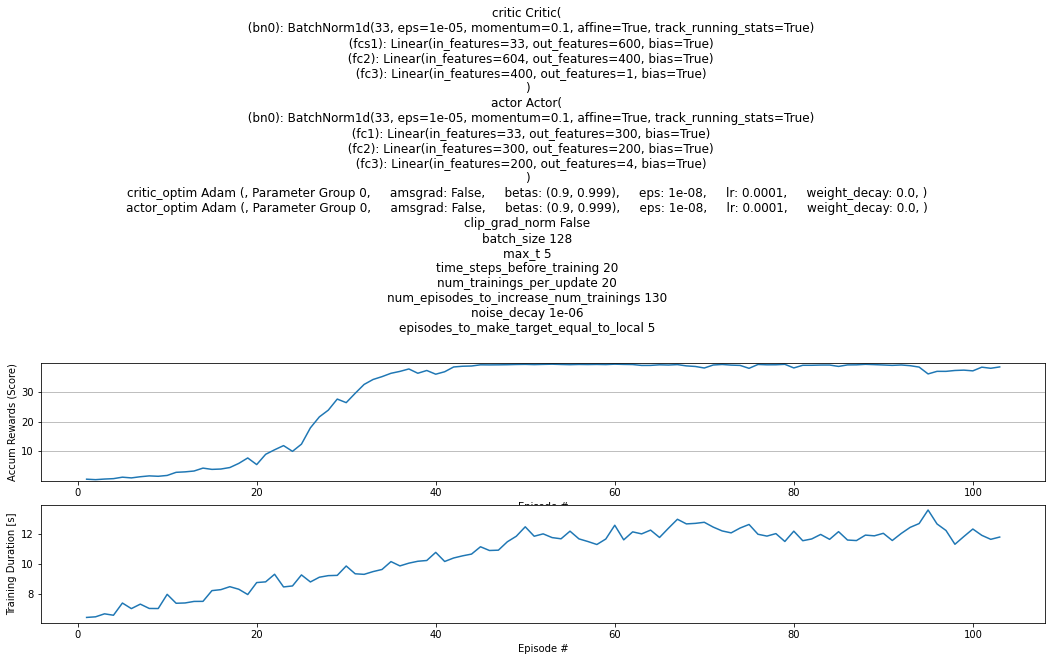

In [20]:
solution_details = {"critic": agent.critic_local.__repr__(),
                         "actor": agent.actor_local.__repr__(),
                         "critic_optim": agent.critic_optimizer.__repr__().replace("\n", ", "),
                         "actor_optim": agent.actor_optimizer.__repr__().replace("\n", ", "),
                         "clip_grad_norm": agent.clip_grad_norm,
                         "batch_size": agent.batch_size,
                         "max_t": episodes_to_make_target_equal_to_local,
                         "time_steps_before_training": agent.time_steps_before_training,
                         "num_trainings_per_update": agent.num_trainings_per_update,
                         "num_episodes_to_increase_num_trainings": agent.num_episodes_to_increase_num_trainings,
                         "noise_decay": agent.noise_decay,
                         "episodes_to_make_target_equal_to_local": episodes_to_make_target_equal_to_local
                         }
generate_training_plots(scores_global, episode_durations,solution_details)

In [ ]:
env.close()

#### 3. Future Works
We also implemented one policy per agent. While it did train the results were not significantly better than the single
 policy solution. However, that was before the final configuration was found with which the challenge was solved.
 Further analysis can be devoted to this solution. It is in the branch multi_agent_multi_policy. In particular the changes from master need to be merged and a strategy for resetting all policies to be equal every number of episodes based on performance can be investigated.

Another issue to tackle if time permits is the lousy training speed.
Observing the figure above it becomes apparent that the training time per episode almost doubles by the end of the training.
After conducting code profiling it became apparent that the sampling from the buffer that increases by size over time takes more and more time.
This is expected as the deque data structure in python is a doubly linked list, albeit with some optimizations that make lookup better than O(N) where N is the number of samples.
Also the GPU utilization is fairly low showing that other system resources are the bottleneck.